In [1]:
%load_ext sql


In [2]:
%sql sqlite:///C:/sqlite/chinook.db

# 1) Self-Joins

In this lesson, we'll learn how to combine the data on columns with different values, how to extract data that isn't matched by those colums, and how to get all possible combinations between rows of two tables.

In addition to joining different tables, it's also possible (and meaningful) to join a table with itself.

In Chinook's schema diagram, there's a table that has a relation with itself:

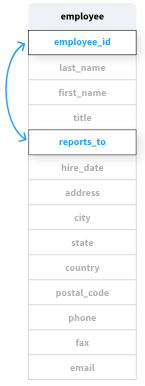

The `reports_to` column identifies each employee's supervisor. If we want to create a table where each row displays information about an `employee` and their manager, we can join employee with itself:

```sql
SELECT e1.employee_id,
       e2.employee_id AS manager_id
  FROM employee AS e1
  JOIN employee AS e2
    ON e1.reports_to = e2.employee_id;
```

Before we look at the results, note the following:

* We used different aliases for each occurrence of `employee`. This is critical, otherwise SQL won't know which data we actually want to select and use.

* For example, in `e2.employee_id AS manager_id`, using `e1` instead of `e2` would just repeat the first column.

* We joined on different columns. As displayed in the diagram, we used the relation `reports_to ↔ employee_id.`

The `employee` table has eight rows, and we only got seven. This is because the general manager doesn't report to anyone. The `reports_to` column has a missing value on this row; thus, the `join condition e1.reports_to = e2.employee_id` never holds.

We'll learn how to include the general manager as an employee in this report later. For now, let's add some useful information to the query above.

## Instructions

![alt text](chinook_schema.svg)

1. Write a query that displays the names of all employees and their managers.

* The result should have a column aliased as `employee`, which is the result of concatenating the **first and last names of the employee**.

* The result should have a column aliased as `manager`, which is the result of concatenating the **first and last names of the manager**.

In [3]:
%%sql
SELECT e1.first_name ||' ' || e1.last_name AS employee,
       e2.first_name ||' ' || e2.last_name AS manager
  FROM employee AS e1
  JOIN employee AS e2
    ON e1.reports_to = e2.employee_id

 * sqlite:///C:/sqlite/chinook.db
Done.


employee,manager
Nancy Edwards,Andrew Adams
Jane Peacock,Nancy Edwards
Margaret Park,Nancy Edwards
Steve Johnson,Nancy Edwards
Michael Mitchell,Andrew Adams
Robert King,Michael Mitchell
Laura Callahan,Michael Mitchell


# 2) LEFT JOIN

Joins work by taking a row from the table specified after the `FROM` clause and checking which rows in the `JOIN` table that satisfy the join condition. Here's an animation that demonstrates this process:

Sometimes we want to keep information about rows that didn't have a match. This happened on the previous screen, where we lost the general manager as an employee because `reports_to` has a missing value, so it never equals an employee id.

To solve this problem, we can use a new kind of join! JOIN is short for `INNER JOIN`. We can use the `LEFT JOIN` so that when a row in the `FROM` table doesn't match any row in the other table, we still add that row to the results.

![alt text](left_join.png)

Note the missing values for the columns `colour` and `number`. Since `Red` didn't match any values in `palette.colour`, we included the first row without filling in the values for those columns.

## A Note About Table Order in Joins:

Now, with `LEFT JOIN`, order starts to matter. All rows from the left table (the `FROM` table) make it to the results. If a row finds a match in the right table (`JOIN` table), they pair up. If not, the row from the left table still appears, but its corresponding columns from the right table show up as **NULLs**.

Switch the table positions, and your results will change. The term "left" in LEFT JOIN indicates which table gets priority. This is also true for RIGHT JOIN and FULL JOIN, which we will see later in this lesson.

## Instructions

1. write a query that displays the names of all employees and their managers. Include employees that don't report to anyone. When an employee doesn't report to anyone, include them with missing values for the columns pertaining to the manager.

* The result should have a column aliased as `employee`, which is the result of concatenating the first and last names of the employee.

* The result should have a column aliased as `manager`, which is the result of concatenating the first and last names of the manager.

In [4]:
%%sql

SELECT e1.first_name ||' ' || e1.last_name AS employee,
       e2.first_name ||' ' || e2.last_name AS manager
  FROM employee AS e1
  LEFT JOIN employee AS e2
    ON e1.reports_to = e2.employee_id

 * sqlite:///C:/sqlite/chinook.db
Done.


employee,manager
Andrew Adams,None
Nancy Edwards,Andrew Adams
Jane Peacock,Nancy Edwards
Margaret Park,Nancy Edwards
Steve Johnson,Nancy Edwards
Michael Mitchell,Andrew Adams
Robert King,Michael Mitchell
Laura Callahan,Michael Mitchell


# 4) Cross JOIN

Sometimes, we'll want all possible combinations of rows between two tables.

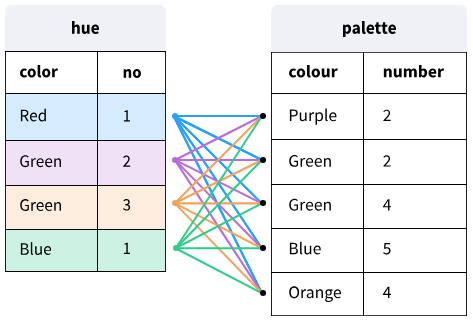

| color | no | colour | number |
|-------|----|--------|--------|
| Red   | 1  | Purple | 2      |
| Red   | 1  | Green  | 2      |
| Red   | 1  | Green  | 4      |
| Red   | 1  | Blue   | 5      |
| Red   | 1  | Orange | 4      |
| Green | 2  | Purple | 2      |
| Green | 2  | Green  | 2      |
| Green | 2  | Green  | 4      |
| Green | 2  | Blue   | 5      |
| Green | 2  | Orange | 4      |
| Green | 3  | Purple | 2      |
| Green | 3  | Green  | 2      |
| Green | 3  | Green  | 4      |
| Green | 3  | Blue   | 5      |
| Green | 3  | Orange | 4      |
| Blue  | 1  | Purple | 2      |
| Blue  | 1  | Green  | 2      |
| Blue  | 1  | Green  | 4      |
| Blue  | 1  | Blue   | 5      |
| Blue  | 1  | Orange | 4      |


We can obtain such a table with a new kind of join: the ``CROSS JOIN``! Here's a query that results in the table above:

```sql
SELECT *
  FROM hue
 CROSS JOIN palette;
```

Note that the CROSS JOIN isn't paired with an `ON` clause. There is no condition on which to join; SQL treats every possible combination as a match.

What happens if we include a `WHERE` clause matching the colors in the query above?

```sql
SELECT *
  FROM hue AS h
 CROSS JOIN palette AS p
 WHERE h.color = p.colour;
```

| color | no | colour | number |
|-------|----|--------|--------|
| Green | 2  | Green  | 2      |
| Green | 2  | Green  | 4      |
| Green | 3  | Green  | 2      |
| Green | 3  | Green  | 4      |
| Blue  | 1  | Blue   | 5      |


The process behind inner joins is equivalent to using a `CROSS JOIN` with `WHERE` instead of `ON`.

## Instructions

Chinook is investigating the possibility of offering a new feature in their service: a matchmaking service that pairs you with another user for joint music listening and chatter. 

To assess whether there's potential in this idea, a data scientist asked you for a table that pairs each customer with every other customer and includes information about the customers.

1. Write a query that does the following:

* Provides all possible combinations of customers in the `customer` table (CROSS JOIN)

* The results should show the first name, last name, and email of the two matched customers.

* From the result above, filter out those rows in which the customer is matched with themselves

In [5]:
%%sql
SELECT c1.first_name,c1.last_name, c1.email,
       c2.first_name as first_name_2,c2.last_name AS last_name_2, c2.email AS email
  FROM customer as c1
 CROSS JOIN customer as c2
 WHERE c1.customer_id <> c2.customer_id
 limit 10;

 * sqlite:///C:/sqlite/chinook.db
Done.


first_name,last_name,email,first_name_2,last_name_2,email_1
Luís,Gonçalves,luisg@embraer.com.br,Leonie,Köhler,leonekohler@surfeu.de
Luís,Gonçalves,luisg@embraer.com.br,François,Tremblay,ftremblay@gmail.com
Luís,Gonçalves,luisg@embraer.com.br,Bjørn,Hansen,bjorn.hansen@yahoo.no
Luís,Gonçalves,luisg@embraer.com.br,František,Wichterlová,frantisekw@jetbrains.com
Luís,Gonçalves,luisg@embraer.com.br,Helena,Holý,hholy@gmail.com
Luís,Gonçalves,luisg@embraer.com.br,Astrid,Gruber,astrid.gruber@apple.at
Luís,Gonçalves,luisg@embraer.com.br,Daan,Peeters,daan_peeters@apple.be
Luís,Gonçalves,luisg@embraer.com.br,Kara,Nielsen,kara.nielsen@jubii.dk
Luís,Gonçalves,luisg@embraer.com.br,Eduardo,Martins,eduardo@woodstock.com.br
Luís,Gonçalves,luisg@embraer.com.br,Alexandre,Rocha,alero@uol.com.br


# 5) Other Joins

The joins we've learned so far cover the most common joins data professionals use. However, some SQL dialects employ other join clauses. We can get their results using the joins that you have already learned, as well as other ways of combining data that you'll learn in the next lesson. Let's look at some of these other joins, namely the `RIGHT JOIN` and the `FULL JOIN`. These joins aren't available in SQLite.

The `RIGHT JOIN` works like `LEFT JOIN`, only instead of using the table in `FROM` first and then iterating over the rows in the "joined" table, we first s**tart with the rows in the joined** table and iterate over the rows in the **FROM table**, keeping the same process as the LEFT JOIN.

Let's go back to the hue and palette tables:

![alt text](hue_palette.png)

The output of the query:

```sql
SELECT *
  FROM hue AS h
 RIGHT JOIN palette AS p
    ON h.color = p.colour;
```

| color | no | colour | number |
|-------|----|--------|--------|
|       |    | Purple | 2      |
| Green | 2  | Green  | 2      |
| Green | 3  | Green  | 2      |
| Green | 2  | Green  | 4      |
| Green | 3  | Green  | 4      |
| Blue  | 1  | Blue   | 5      |
|       |    | Orange | 4      |


We can more precisely describe the internal process that SQL runs like this:

1. First, SQL will select a row of the table in `palette`.

1. Then it will iterate over all rows in `hue` and do the following:

    * Check whether `palette.colour `equals `hue.color`.

        * For those that are equal, include them in the result.

        * If not equal, add a row to the result including the values in `palette` and missing values for the columns in `hue`.

## FULL JOIN

As for the `FULL JOIN`, it's a combination of both `LEFT JOIN` and `RIGHT JOIN`: rows from both tables that didn't produce a match are in the output with missing values on the columns pertaining to the other table. Here's an example: 

```sql
SELECT *
  FROM hue AS h
 FULL JOIN palette AS p
    ON h.color = p.colour;
```

| color | no | colour | number |
|-------|----|--------|--------|
| Red   | 1  |        |        |
| Green | 2  | Green  | 2      |
| Green | 2  | Green  | 4      |
| Green | 3  | Green  | 2      |
| Green | 3  | Green  | 4      |
| Blue  | 1  | Blue   | 5      |
|       |    | Orange | 4      |
|       |    | Purple | 2      |


Note the following:

* The first row is the row that was introduced when we moved from `INNER JOIN` to `LEFT JOIN`.

* The last two rows were introduced when we moved from `INNER JOIN` to `RIGHT JOIN`.

* The remaining rows are the ones resulting from `INNER JOIN`.

# 6) Joining on Conditions

So far, we've learned to join data on conditions that looked like `column = another_column`. These kinds of joins, where the condition is an equality are equi-joins. All joins we've seen so far are equi-joins

What if we want only those rows where number isn't 2?

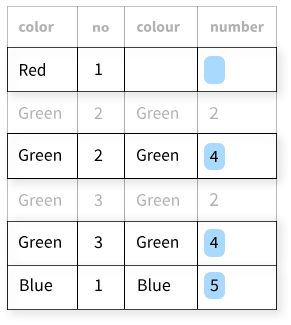

```sql
SELECT *
  FROM hue AS h
  LEFT JOIN palette AS p
    ON h.color = p.colour
 WHERE p.number <> 2;

```

which would display this:

| color | no | colour | number |
|-------|----|--------|--------|
| Green | 2  | Green  | 4      |
| Green | 3  | Green  | 4      |
| Blue  | 1  | Blue   | 5      |


which, isn't what we want! This is because missing values don't satisfy the condition. One way to fix this is to join on a more complex condition:

```sql
SELECT *
  FROM hue AS h
  LEFT JOIN palette AS p
    ON h.color = p.colour AND p.number <> 2;
```

The process looks like what we've been using — the only difference is that the condition we're checking isn't an equality but, rather, a conjunction `between h.color = p.colour` and `p.number <> 2`.

## Instructions

![alt text](chinook_schema.svg)

Provide a list of all songs in `track` and the number of times each track appeared in purchases during 2020. For each track, include the following information:

* The ID of the track

* The name of the track

* The number of times the track appeared in purchases in 2020, aliased as `no_of_purchases`

In [7]:
%%sql
SELECT t.track_id, t.name,
       COUNT(i.invoice_id) as no_of_purchases
  FROM track as t
  LEFT JOIN invoice_line as il
  ON t.track_id = il.track_id
  LEFT JOIN invoice as i
  ON i.invoice_id = il.invoice_id and invoice_date LIKE '2020%' 
  GROUP BY t.track_id, t.name
  limit 5;

 * sqlite:///C:/sqlite/chinook.db
Done.


track_id,name,no_of_purchases
1,For Those About To Rock (We Salute You),1
2,Balls to the Wall,0
3,Fast As a Shark,1
4,Restless and Wild,2
5,Princess of the Dawn,0


# 7) Joining on Conditions (continuation)

On this screen, we'll learn another use case for non-equi-joins.

In retail business, cash registers typically provide the total amount purchased over a certain period of time (e.g., for the day). This amount is a computation of sequential addition of the total of each purchase, also called the **running total**.

On this screen, we're going to compute the running total of all the transactions in Chinook.

Our first milestone is to get a table that relates each invoice to its previous invoices. Here's how the first few rows of this milestone look:

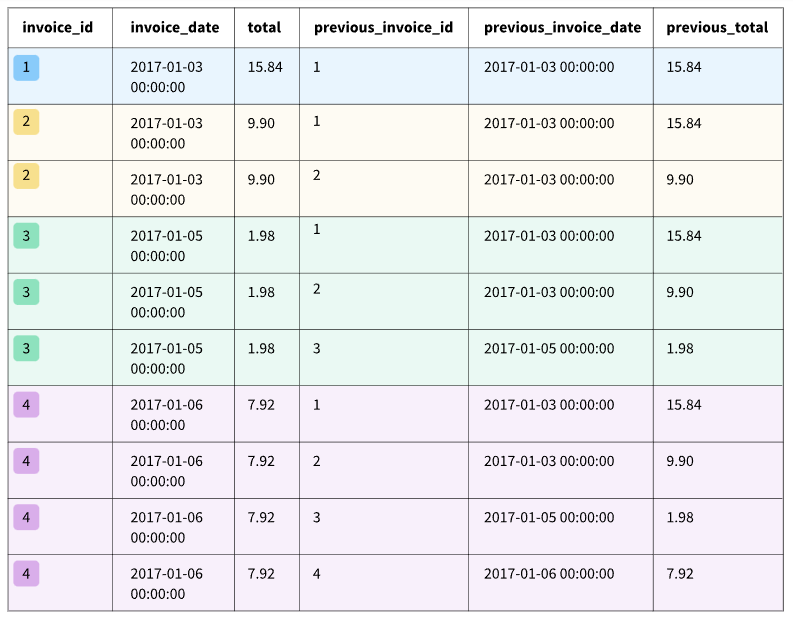

Note the following:

* The first invoice appears on the left columns only once, and it's related in the "previous" columns only to **itself**.

* The second invoice appears on the left columns twice, and it's related in the "previous" columns to its **previous invoice and itself**.

* And so on and so forth.

By grouping by invoice_id and summing previous_total, we get something close to our goal:

| invoice_id | previous_total |
|------------|----------------|
| 1          | 15.84          |
| 2          | 25.74          |
| 3          | 27.72          |
| 4          | 35.64          |
| 5          | 52.47          |
| 6          | 54.45          |
| 7          | 65.34          |
| 8          | 75.24          |
| 9          | 84.15          |
| 10         | 86.13          |

So let's work on getting that milestone table. As we observed, each invoice relates itself and its previous invoices. Translating this into the columns in our database, we have `invoice_id >= previous_invoice_id`. 

**This is our join condition! **Well, not exactly because `previous_invoice_id` isn't an actual column in the database, so we need to tweak the condition. Here's one query that displays our milestone table.



In [8]:
%%sql
SELECT i1.invoice_id, i1.invoice_date, i1.total,
       i2.invoice_id AS previous_invoice_id,
       i2.invoice_date AS previous_invoice_date,
       i2.total AS previous_total
  FROM invoice i1
  JOIN invoice i2
    ON i1.invoice_id >= i2.invoice_id
    limit 10;

 * sqlite:///C:/sqlite/chinook.db
Done.


invoice_id,invoice_date,total,previous_invoice_id,previous_invoice_date,previous_total
1,2017-01-03 00:00:00,15.84,1,2017-01-03 00:00:00,15.84
2,2017-01-03 00:00:00,9.9,1,2017-01-03 00:00:00,15.84
2,2017-01-03 00:00:00,9.9,2,2017-01-03 00:00:00,9.9
3,2017-01-05 00:00:00,1.98,1,2017-01-03 00:00:00,15.84
3,2017-01-05 00:00:00,1.98,2,2017-01-03 00:00:00,9.9
3,2017-01-05 00:00:00,1.98,3,2017-01-05 00:00:00,1.98
4,2017-01-06 00:00:00,7.92,1,2017-01-03 00:00:00,15.84
4,2017-01-06 00:00:00,7.92,2,2017-01-03 00:00:00,9.9
4,2017-01-06 00:00:00,7.92,3,2017-01-05 00:00:00,1.98
4,2017-01-06 00:00:00,7.92,4,2017-01-06 00:00:00,7.92


## Instructions

1. Write a query that displays one invoice per row with the following data:

* The invoice ID

* The date of the invoice

* The total of the invoice

* The running total for the invoice, rounded to two decimal places aliased as running_total

In [9]:
%%sql
SELECT i1.invoice_id, i1.invoice_date, i1.total,
       SUM(i2.total) as running_total
  FROM invoice i1
  JOIN invoice i2
    ON i1.invoice_id >= i2.invoice_id
    GROUP BY i1.invoice_id, i1.invoice_date, i1.total
limit 10;

 * sqlite:///C:/sqlite/chinook.db
Done.


invoice_id,invoice_date,total,running_total
1,2017-01-03 00:00:00,15.84,15.84
2,2017-01-03 00:00:00,9.9,25.740000000000002
3,2017-01-05 00:00:00,1.98,27.72
4,2017-01-06 00:00:00,7.92,35.64
5,2017-01-07 00:00:00,16.83,52.47
6,2017-01-10 00:00:00,1.98,54.449999999999996
7,2017-01-12 00:00:00,10.89,65.34
8,2017-01-13 00:00:00,9.9,75.24
9,2017-01-18 00:00:00,8.91,84.15
10,2017-01-18 00:00:00,1.98,86.13
